In [38]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import os

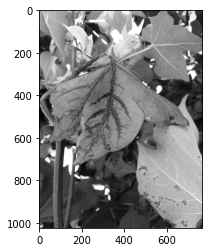

In [39]:
train_path= '/Users/rahul/Desktop/Desktop/Assignments/Set-2/cotton_infection_dir_ready/train'
valid_path= '/Users/rahul/Desktop/Desktop/Assignments/Set-2/cotton_infection_dir_ready/test'

categories= ["bacterial_blight","curl_virus","fussarium_wilt","healthy"]

for category in categories :
    path = os.path.join(train_path, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
    

In [40]:
training_data = []

def create_training_data():
    for category in categories :
        path = os.path.join(train_path, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (224,224))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data() 

libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB


In [41]:
test_data = []

def create_test_data():
     for category in categories :
        path = os.path.join(valid_path, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (224,224))
                test_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_test_data() 
    

libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB


In [42]:
len(training_data),len(test_data)

(1442, 343)

In [43]:
import random 
random.shuffle(training_data)
random.shuffle(test_data)

In [44]:
X_train= []
y_train= []

for feature,label in training_data:
    X_train.append(feature)
    y_train.append(label)
    
X_train = np.array(X_train).reshape(-1,224,224,1)

In [45]:
y_train=np.array(y_train).reshape(-1,1)
y_train = to_categorical(y_train, num_classes=4)

In [46]:
X_train.shape, y_train.shape

((1442, 224, 224, 1), (1442, 4))

In [47]:
X_test= []
y_test= []

for feature,label in test_data:
    X_test.append(feature)
    y_test.append(label)
    
X_test = np.array(X_test).reshape(-1,224,224,1)

In [48]:
y_test= np.array(y_test).reshape(-1,1)
y_test = to_categorical(y_test, num_classes=4)

In [49]:
X_test.shape, y_test.shape

((343, 224, 224, 1), (343, 4))

In [50]:
#normalizing the images
X_train=X_train/255.0
X_test=X_test/255.0

In [51]:
#building CNN model from scratch
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape= X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [52]:
history = model.fit(X_train,y_train, batch_size=32, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
46/46 [==============================] - ETA: 0s - loss: 1.8335 - accuracy: 0.2975WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f98be0b6830> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and 

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 64)      640       
                                                                 
 activation_12 (Activation)  (None, 222, 222, 64)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 activation_13 (Activation)  (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

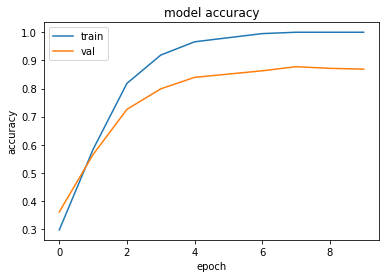

In [55]:
#ploting the accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

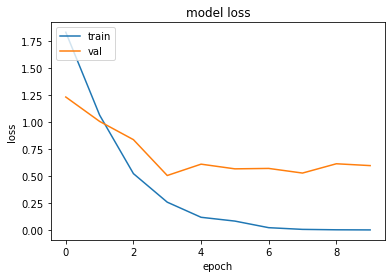

In [56]:
#ploting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [58]:
model.save('/Users/rahul/Desktop/Desktop/Assignments/Set-2/cotton_infection_dir_ready/CNN_model.model')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity t

2022-06-28 20:18:42.625792: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /Users/rahul/Desktop/Desktop/Assignments/Set-2/cotton_infection_dir_ready/CNN_model.model/assets


In [68]:
def prepare(filepath):
    IMG_SIZE=224
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model('/Users/rahul/Desktop/Desktop/Assignments/Set-2/cotton_infection_dir_ready/CNN_model.model')

In [76]:
prediction = model.predict([prepare('/Users/rahul/Desktop/Desktop/Assignments/Set-2/cotton_infection_dir_ready/test/curl_virus/curl14.jpg')])


In [77]:
#predicting the class
for i in range(1):
    for j in range(4):
        if(int(prediction[i][j])):
            print('Predicted class is',categories[j])  

Predicted class is curl_virus
